<a href="https://colab.research.google.com/github/chilaact/predict_aquatic_toxity/blob/master/predict_aquatic_toxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QSAR Aquatic Toxicity Prediction with Simple Neural Networks Using TensorFlow

Mount drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [0]:
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Load data

In [17]:
data = read_csv("/content/drive/My Drive/Colab Notebooks/task/qsar_aquatic_toxicity.csv", sep=";")
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


dataset from https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

## Split data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitive response'),
                                                   data['quantitive response'],
                                                   test_size=0.3)

## Train and test the models

In [19]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))

Mead Squared Error Linear Regression :  1.3012890547848859
Mead Squared Error Multilayer Perceptron :  1.3711104905479665


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


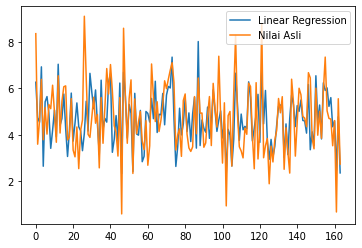

In [20]:
plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")

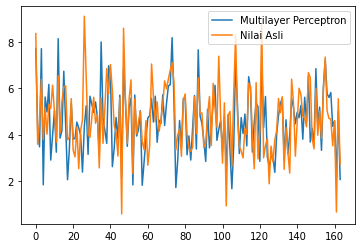

In [21]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")

<h2>TENSORFLOW PART</h2>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import Sequential, layers, optimizers

## Modeling

In [0]:
def Simple_NN():
  model = Sequential([
    layers.Dense(8, activation='relu', input_shape=[8]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Consists of :
8 nodes in the input layer
8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [24]:
model = Simple_NN()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Training model

In [25]:
model.fit(x_train, y_train, epochs=100, validation_split = 0.2, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 313.6968 - mae: 12.8047 - mse: 322.9211 - val_loss: 189.3105 - val_mae: 9.5238 - val_mse: 168.1956
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 106.8747 - mae: 7.4596 - mse: 110.1520 - val_loss: 61.5283 - val_mae: 5.8308 - val_mse: 58.1502
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 41.2019 - mae: 5.0080 - mse: 42.3815 - val_loss: 14.8941 - val_mae: 3.0547 - val_mse: 15.8967
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 17.9051 - mae: 3.3993 - mse: 18.1352 - val_loss: 13.9419 - val_mae: 2.8223 - val_mse: 13.2131
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 14.1597 - mae: 3.0173 - mse: 14.3217 - val_loss: 13.3429 - val_mae: 2.6512 - val_mse: 12.2953
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 12.1644 - mae: 2.8216 - mse: 12.1799 - val_loss: 10.5997 - val_mae: 2.4050 - val_mse

## Using model to predict the <b>x_test</b>

In [26]:
hasil_tf = model.predict(x_test)

# HASIL PREDIKSI
hasil_tf.ravel()

array([6.568257 , 3.6406655, 3.3451238, 6.683512 , 2.3630133, 5.3989673,
       4.134548 , 6.2685246, 2.5349412, 4.13955  , 4.8199997, 3.9194703,
       8.090242 , 3.5857568, 4.2895517, 6.2214603, 3.3639095, 2.6305642,
       3.943766 , 3.1575794, 3.045897 , 4.0389333, 4.5572133, 3.4399674,
       4.1281962, 2.2661076, 3.5938344, 4.6598907, 3.344359 , 5.2770047,
       5.30946  , 4.6360097, 5.106374 , 4.5728536, 3.1351285, 7.2021546,
       4.382952 , 4.291371 , 3.7964578, 6.450995 , 6.4659724, 2.714625 ,
       3.2069933, 4.396586 , 4.029225 , 4.6061907, 2.615541 , 6.4070506,
       4.8389463, 3.487764 , 4.8385386, 5.24902  , 2.2214198, 5.395246 ,
       3.8087764, 2.8932948, 4.827436 , 2.4934087, 3.2332368, 3.787972 ,
       3.744906 , 4.678691 , 4.9424844, 4.3003793, 4.8442273, 3.820034 ,
       4.6142836, 4.2614417, 4.967544 , 4.443667 , 5.3739915, 5.762085 ,
       6.2049475, 7.1063905, 5.1216397, 2.3764195, 2.8157506, 4.3653846,
       3.590859 , 5.6867776, 5.4496493, 3.3311849, 

## Evaluate the model using <b>mean squared error</b>

In [27]:
mean_squared_error(y_test, hasil_tf)

1.4492967067052454

Getting smaller the MSE of a model, getting better model in predicting

## Line chart

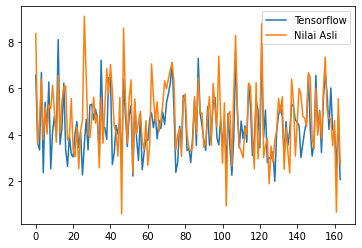

In [28]:
plt.plot(list(hasil_tf), label='Tensorflow')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")